In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import ast

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
clinical_cohort_w_new_ID = '/Users/ryanyutian/Desktop/Manuscript/cohort/202404_clinical_info.csv'

clinical_cohort_w_new_ID_df = pd.read_csv(clinical_cohort_w_new_ID, sep=',', index_col=0)

In [4]:
clinical_cohort_w_new_ID_df

,TissueID,OldSampleID,OldPairID,NewSampleID,NewPairID,LongRanger,TumourStage,Age,AgeCohort,Sex,TumourGrade,Pathology,Pathology_Detailed,TumourType,SurgeryDate,Dexamethasone_Decadron,OtherDrugs,Treatment,TMZ,RT,IDH12Status,CellLineAvailable,NucleiSeq,LRWGS,MatchedNormal,MatchedNormalID,MatchedNormalLongRangerDate,IDH1StatusFromLongRanger,IDH1_Other
1,GBM607,A_R_GBM607,A,A_R_GBM607,A,181113,Recurrence,25,Adult,Male,II,Oligoastrocytoma,Oligoatrocytoma,LGG,201211,Yes,None,None,No,No,IDH1_R132H,Yes,Yes,Yes,Yes,G809,200504.0,R132H,V178I_in_normal_and_tumour
2,GBM809r,A_RR_GBM809,A,A_RR_GBM809,A,181113,SecondRecurrence,28,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201510,Yes,PCV,TMZ+RT,Yes,Yes,IDH1_R132H,Yes,Yes,Yes,Yes,G809,200504.0,R132H,V178I_in_normal_and_tumour
3,GBM593,B_P_GBM593,B,B_P_GBM593,B,181113,Primary,30,Adult,Female,II,Oligoastrocytoma,Oligoatrocytoma,LGG,201208,No,None,None,No,No,N.D.,No,Yes,Yes,No,NaN,NaN,R132S,NaN
4,GBM898r,B_R_GBM898,B,B_R_GBM898,B,181113,Recurrence,35,Adult,Female,II,Astrocytoma,Diffuse_Astrocytoma,LGG,201702,No,None,TMZ+RT,No,No,N.D.,No,Yes,Yes,No,NaN,NaN,R132S,NaN
5,GBM781,E_R_GBM781,E,C_R_GBM781,C,200623,Recurrence,37,Adult,Male,II,Oligodendroglioma,Oligodendroglioma,LGG,201404,Yes,Keppra,None,No,No,N.D.,No,No,Yes,Yes,SMTB211,200504.0,R132H,NaN
6,GBM937,E_RR_GBM937,E,C_RR_GBM937,C,210312,SecondRecurrence,39,Adult,Male,III,Oligodendroglioma,Oligodendroglioma,LGG,201708,Yes,None,TMZ+RT,Yes,Yes,N.D.,No,No,Yes,Yes,SMTB211,200504.0,R132H,NaN
7,GBM620,F_P_GBM620,F,D_P_GBM620,D,191212,Primary,55,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201212,N.D.,N.D.,None,No,No,IDH1_R100Q,Yes,Yes,Yes,No,NaN,NaN,R100Q,NaN
8,GBM691r,F_R_GBM691,F,D_R_GBM691,D,190129,Recurrence,56,Adult,Male,IV,Glioblastoma,Glioblastoma,GBM,201311,N.D.,N.D.,TMZ+RT,Yes,Yes,IDH1_R100Q,Yes,Yes,Yes,No,NaN,NaN,R100Q,NaN
9,GBM454,G_P_GBM454,G,E_P_GBM454,E,181113,Primary,4,Pediatric,Female,I,Astrocytoma,Pilocytic_Astrocytoma,LGG,201007,N.D.,N.D.,None,No,No,N.D.,No,Yes,Yes,Yes,BT_2009038,220217.0,WT,NaN
10,GBM833r,G_R_GBM833,G,E_R_GBM833,E,181113,Recurrence,9,Pediatric,Female,I,Astrocytoma,Pilocytic_Astrocytoma,LGG,201602,N.D.,N.D.,TMZ+RT,Yes,Yes,N.D.,No,Yes,Yes,Yes,BT_2009038,220217.0,WT,NaN


In [6]:
columns_to_select = ['NewSampleID', 'Sex', 'Age', 'TumourStage', 'TumourGrade', 'Pathology', 'IDH1StatusFromLongRanger']

clinical_to_plot = clinical_cohort_w_new_ID_df[columns_to_select].copy()

clinical_to_plot

,NewSampleID,Sex,Age,TumourStage,TumourGrade,Pathology,IDH1StatusFromLongRanger
1,A_R_GBM607,Male,25,Recurrence,II,Oligoastrocytoma,R132H
2,A_RR_GBM809,Male,28,SecondRecurrence,IV,Glioblastoma,R132H
3,B_P_GBM593,Female,30,Primary,II,Oligoastrocytoma,R132S
4,B_R_GBM898,Female,35,Recurrence,II,Astrocytoma,R132S
5,C_R_GBM781,Male,37,Recurrence,II,Oligodendroglioma,R132H
6,C_RR_GBM937,Male,39,SecondRecurrence,III,Oligodendroglioma,R132H
7,D_P_GBM620,Male,55,Primary,IV,Glioblastoma,R100Q
8,D_R_GBM691,Male,56,Recurrence,IV,Glioblastoma,R100Q
9,E_P_GBM454,Female,4,Primary,I,Astrocytoma,WT
10,E_R_GBM833,Female,9,Recurrence,I,Astrocytoma,WT


In [7]:
# Function to convert strings to int, and keep 'N.D.' as str
def convert(val):
    try:
        return int(val) 
    except ValueError:
        return val

# Apply the function to the 'mixed_data' column
clinical_to_plot['Age'] = clinical_to_plot['Age'].apply(convert)

clinical_to_plot

,NewSampleID,Sex,Age,TumourStage,TumourGrade,Pathology,IDH1StatusFromLongRanger
1,A_R_GBM607,Male,25,Recurrence,II,Oligoastrocytoma,R132H
2,A_RR_GBM809,Male,28,SecondRecurrence,IV,Glioblastoma,R132H
3,B_P_GBM593,Female,30,Primary,II,Oligoastrocytoma,R132S
4,B_R_GBM898,Female,35,Recurrence,II,Astrocytoma,R132S
5,C_R_GBM781,Male,37,Recurrence,II,Oligodendroglioma,R132H
6,C_RR_GBM937,Male,39,SecondRecurrence,III,Oligodendroglioma,R132H
7,D_P_GBM620,Male,55,Primary,IV,Glioblastoma,R100Q
8,D_R_GBM691,Male,56,Recurrence,IV,Glioblastoma,R100Q
9,E_P_GBM454,Female,4,Primary,I,Astrocytoma,WT
10,E_R_GBM833,Female,9,Recurrence,I,Astrocytoma,WT


In [8]:
clinical_to_plot_color_df = clinical_to_plot.copy()

### Sex ###
sex_color = {'Female': 'violet', 'Male': 'dodgerblue'}
clinical_to_plot_color_df['Sex'] = clinical_to_plot['Sex'].map(sex_color)

### Age ###
def age_to_color(age):
    if age == 'N.D.':
        return 'gray'
    else:
        cmap = sns.color_palette("viridis_r", as_cmap=True)
        return cmap(int(age) / 100)
    
clinical_to_plot_color_df['Age'] = clinical_to_plot['Age'].apply(age_to_color)

### TumourStage ###
def stage_to_color(stage):
    cmap = sns.color_palette("YlOrBr", as_cmap=True)
    if stage == 'Primary':
        return cmap(0.2)
    
    elif stage == 'Recurrence':
        return cmap(0.6)

    elif stage == 'SecondRecurrence':
        return cmap(1.0)
    
clinical_to_plot_color_df['TumourStage'] = clinical_to_plot['TumourStage'].apply(stage_to_color)

### TumourGrade ###
def grade_to_color(grade):
    cmap = sns.color_palette("magma_r", as_cmap=True)
    if grade == 'I':
        return cmap(0.1)
    
    elif grade == 'II':
        return cmap(0.35)

    elif grade == 'III':
        return cmap(0.6)

    elif grade == 'IV':
        return cmap(0.85)

clinical_to_plot_color_df['TumourGrade'] = clinical_to_plot['TumourGrade'].apply(grade_to_color)

### Pathology ###
def path_to_color(path):
    cmap = sns.color_palette("Spectral", as_cmap=True)
    if path == 'Astrocytoma':
        return cmap(0.4)
    
    elif path == 'Oligoastrocytoma':
        return cmap(0.1)

    elif path == 'Oligodendroglioma':
        return cmap(0.7)

    elif path == 'Glioblastoma':
        return cmap(0.9)

clinical_to_plot_color_df['Pathology'] = clinical_to_plot['Pathology'].apply(path_to_color)

### IDH Status ###
def IDH_to_color(IDH_status):    
    if IDH_status != 'WT':
        return 'dimgray'
    else:
        return 'white'
    
clinical_to_plot_color_df['IDH1StatusFromLongRanger'] = \
clinical_to_plot['IDH1StatusFromLongRanger'].apply(IDH_to_color)

In [10]:
clinical_to_plot_color_df.set_index('NewSampleID', inplace=True)

clinical_to_plot_color_df

,Sex,Age,TumourStage,TumourGrade,Pathology,IDH1StatusFromLongRanger
NewSampleID,,,,,,
A_R_GBM607,dodgerblue,"(0.360741, 0.785964, 0.387814, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.8310649750096117, 0.23844675124951936, 0.30...",dimgray
A_RR_GBM809,dodgerblue,"(0.304148, 0.764704, 0.419943, 1.0)","(0.4, 0.1450980392156863, 0.02352941176470588,...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...",dimgray
B_P_GBM593,violet,"(0.266941, 0.748751, 0.440573, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.929845, 0.352734, 0.372677, 1.0)","(0.8310649750096117, 0.23844675124951936, 0.30...",dimgray
B_R_GBM898,violet,"(0.185783, 0.704891, 0.485273, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...",dimgray
C_R_GBM781,dodgerblue,"(0.162016, 0.687316, 0.499129, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...",dimgray
C_RR_GBM937,dodgerblue,"(0.143303, 0.669459, 0.511215, 1.0)","(0.4, 0.1450980392156863, 0.02352941176470588,...","(0.550287, 0.161158, 0.505719, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...",dimgray
D_P_GBM620,dodgerblue,"(0.144759, 0.519093, 0.556572, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...",dimgray
D_R_GBM691,dodgerblue,"(0.149039, 0.508051, 0.55725, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...",dimgray
E_P_GBM454,violet,"(0.89632, 0.893616, 0.096335, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.99568, 0.812706, 0.572645, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...",white


In [11]:
from matplotlib.colors import to_rgba

clinical_to_plot_color_df = clinical_to_plot_color_df.applymap(lambda x: to_rgba(x) if isinstance(x, str) else x)

clinical_to_plot_color_df

,Sex,Age,TumourStage,TumourGrade,Pathology,IDH1StatusFromLongRanger
NewSampleID,,,,,,
A_R_GBM607,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.360741, 0.785964, 0.387814, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.8310649750096117, 0.23844675124951936, 0.30...","(0.4117647058823529, 0.4117647058823529, 0.411..."
A_RR_GBM809,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.304148, 0.764704, 0.419943, 1.0)","(0.4, 0.1450980392156863, 0.02352941176470588,...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.4117647058823529, 0.4117647058823529, 0.411..."
B_P_GBM593,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.266941, 0.748751, 0.440573, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.929845, 0.352734, 0.372677, 1.0)","(0.8310649750096117, 0.23844675124951936, 0.30...","(0.4117647058823529, 0.4117647058823529, 0.411..."
B_R_GBM898,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.185783, 0.704891, 0.485273, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...","(0.4117647058823529, 0.4117647058823529, 0.411..."
C_R_GBM781,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.162016, 0.687316, 0.499129, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...","(0.4117647058823529, 0.4117647058823529, 0.411..."
C_RR_GBM937,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.143303, 0.669459, 0.511215, 1.0)","(0.4, 0.1450980392156863, 0.02352941176470588,...","(0.550287, 0.161158, 0.505719, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...","(0.4117647058823529, 0.4117647058823529, 0.411..."
D_P_GBM620,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.144759, 0.519093, 0.556572, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.4117647058823529, 0.4117647058823529, 0.411..."
D_R_GBM691,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.149039, 0.508051, 0.55725, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.4117647058823529, 0.4117647058823529, 0.411..."
E_P_GBM454,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.89632, 0.893616, 0.096335, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.99568, 0.812706, 0.572645, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...","(1.0, 1.0, 1.0, 1.0)"


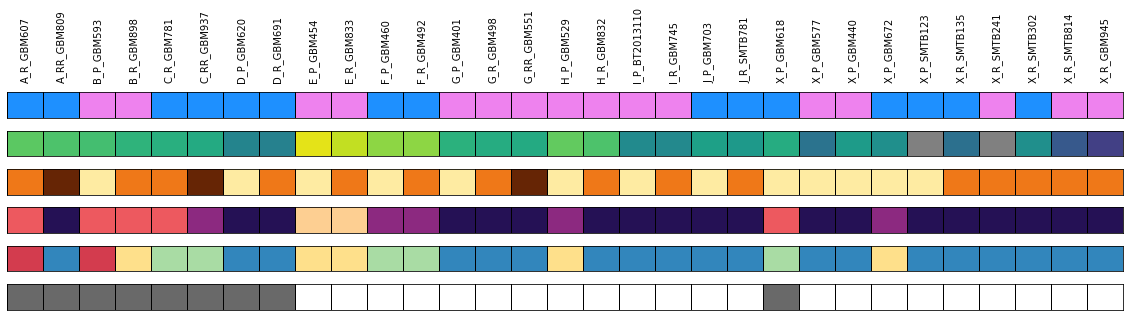

In [12]:
# Number of rows equals the number of columns in DataFrame
fig, axs = plt.subplots(6, 1, figsize=(20, 4))

# Adjusting the space between the subplots
plt.subplots_adjust(hspace=0.5)

### Sex ###
colors = clinical_to_plot_color_df['Sex'].tolist()
axs[0].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[0].axvline(x=j-0.5, color='black', linewidth=1)

# Removing y ticks and x tick marks
axs[0].set_yticks([])
axs[0].set_xticks(range(len(clinical_to_plot_color_df)))
axs[0].set_xticklabels(clinical_to_plot_color_df.index, rotation=90)
axs[0].xaxis.set_ticks_position('top')
axs[0].tick_params(axis='x', length=0, pad=10)  

### Age ###
colors = clinical_to_plot_color_df['Age'].tolist()
axs[1].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[1].axvline(x=j-0.5, color='black', linewidth=1)

# Removing y ticks
axs[1].set_yticks([])
axs[1].set_xticks([])

### TumourStage ###
colors = clinical_to_plot_color_df['TumourStage'].tolist()
axs[2].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[2].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[2].set_yticks([])
axs[2].set_xticks([])

### TumourGrade ###
colors = clinical_to_plot_color_df['TumourGrade'].tolist()
axs[3].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[3].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[3].set_yticks([])
axs[3].set_xticks([])

### Pathology ###
colors = clinical_to_plot_color_df['Pathology'].tolist()
axs[4].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[4].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[4].set_yticks([])
axs[4].set_xticks([])

### IDH Mutant/WT ###
colors = clinical_to_plot_color_df['IDH1StatusFromLongRanger'].tolist()
axs[5].imshow([colors], aspect='auto')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[5].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[5].set_yticks([])
axs[5].set_xticks([])


plt.show()


In [13]:
burden_ordered_dict = \
{'E_P_GBM454': 2.567235,
 'J_R_SMTB781': 3.440943,
 'X_R_SMTB302': 4.226884,
 'B_R_GBM898': 4.919731,
 'D_P_GBM620': 5.990988,
 'X_R_SMTB135': 7.883471,
 'X_P_GBM618': 8.284311,
 'C_R_GBM781': 12.199561,
 'B_P_GBM593': 38.391686,
 'A_R_GBM607': 46.185048,
 'H_P_GBM529': 57.432402,
 'C_RR_GBM937': 62.922092,
 'A_RR_GBM809': 75.856075,
 'J_P_GBM703': 78.300209,
 'D_R_GBM691': 80.846212,
 'X_P_GBM672': 96.535132,
 'I_P_BT2013110': 104.15168,
 'E_R_GBM833': 135.700069,
 'G_P_GBM401': 141.95875,
 'I_R_GBM745': 183.607591,
 'X_P_GBM440': 186.296958,
 'X_P_GBM577': 274.532488,
 'X_R_SMTB814': 288.11394,
 'X_R_SMTB241': 351.327896,
 'G_RR_GBM551': 373.397682,
 'X_P_SMTB123': 384.904527,
 'G_R_GBM498': 405.059911,
 'F_R_GBM492': 488.731192,
 'F_P_GBM460': 509.914535,
 'X_R_GBM945': 582.347414,
 'H_R_GBM832': 692.785582}

burden_order_list = [i for i in burden_ordered_dict]

In [14]:
ordered_clinical_to_plot_color_df = clinical_to_plot_color_df.reindex(burden_order_list).copy()

ordered_clinical_to_plot_color_df

,Sex,Age,TumourStage,TumourGrade,Pathology,IDH1StatusFromLongRanger
NewSampleID,,,,,,
E_P_GBM454,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.89632, 0.893616, 0.096335, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.99568, 0.812706, 0.572645, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...","(1.0, 1.0, 1.0, 1.0)"
J_R_SMTB781,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.119738, 0.603785, 0.5414, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(1.0, 1.0, 1.0, 1.0)"
X_R_SMTB302,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.128729, 0.563265, 0.551229, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(1.0, 1.0, 1.0, 1.0)"
B_R_GBM898,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.185783, 0.704891, 0.485273, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.996078431372549, 0.8784313725490196, 0.5450...","(0.4117647058823529, 0.4117647058823529, 0.411..."
D_P_GBM620,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.144759, 0.519093, 0.556572, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.4117647058823529, 0.4117647058823529, 0.411..."
X_R_SMTB135,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.175841, 0.44129, 0.557685, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.146785, 0.068738, 0.334011, 1.0)","(0.19946174548250672, 0.5289504036908881, 0.73...","(1.0, 1.0, 1.0, 1.0)"
X_P_GBM618,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.150148, 0.676631, 0.506589, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.929845, 0.352734, 0.372677, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...","(0.4117647058823529, 0.4117647058823529, 0.411..."
C_R_GBM781,"(0.11764705882352941, 0.5647058823529412, 1.0,...","(0.162016, 0.687316, 0.499129, 1.0)","(0.939607843137255, 0.4713725490196078, 0.0949...","(0.929845, 0.352734, 0.372677, 1.0)","(0.6652825836216842, 0.8645905420991927, 0.643...","(0.4117647058823529, 0.4117647058823529, 0.411..."
B_P_GBM593,"(0.9333333333333333, 0.5098039215686274, 0.933...","(0.266941, 0.748751, 0.440573, 1.0)","(0.9976470588235294, 0.9215686274509803, 0.636...","(0.929845, 0.352734, 0.372677, 1.0)","(0.8310649750096117, 0.23844675124951936, 0.30...","(0.4117647058823529, 0.4117647058823529, 0.411..."


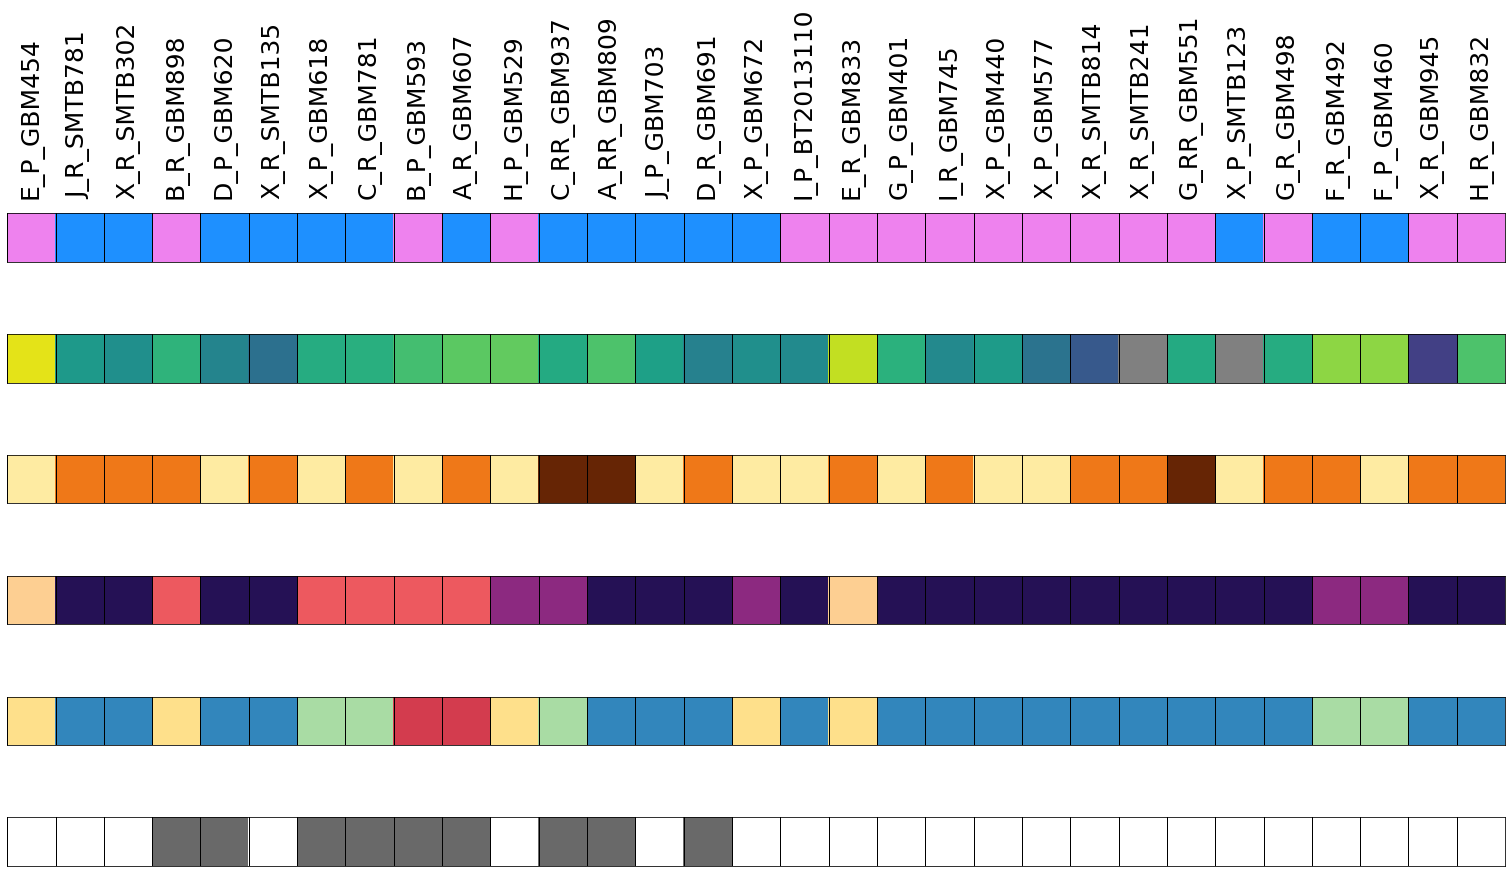

In [39]:
# Number of rows equals the number of columns in DataFrame
fig, axs = plt.subplots(6, 1, figsize=(50, 12))

# Adjusting the space between the subplots
plt.subplots_adjust(hspace=1.5)

### Sex ###
colors = ordered_clinical_to_plot_color_df['Sex'].tolist()
axs[0].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[0].axvline(x=j-0.5, color='black', linewidth=1)

# Removing y ticks and x tick marks
axs[0].set_yticks([])
axs[0].set_xticks(range(len(ordered_clinical_to_plot_color_df)))
axs[0].set_xticklabels(ordered_clinical_to_plot_color_df.index, rotation=90, fontsize=25)
axs[0].xaxis.set_ticks_position('top')
axs[0].tick_params(axis='x', length=0, pad=15)  

### Age ###
colors = ordered_clinical_to_plot_color_df['Age'].tolist()
axs[1].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[1].axvline(x=j-0.5, color='black', linewidth=1)

# Removing y ticks
axs[1].set_yticks([])
axs[1].set_xticks([])

### TumourStage ###
colors = ordered_clinical_to_plot_color_df['TumourStage'].tolist()
axs[2].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[2].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[2].set_yticks([])
axs[2].set_xticks([])

### TumourGrade ###
colors = ordered_clinical_to_plot_color_df['TumourGrade'].tolist()
axs[3].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[3].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[3].set_yticks([])
axs[3].set_xticks([])

### Pathology ###
colors = ordered_clinical_to_plot_color_df['Pathology'].tolist()
axs[4].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[4].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[4].set_yticks([])
axs[4].set_xticks([])

### IDH Mutant/WT ###
colors = ordered_clinical_to_plot_color_df['IDH1StatusFromLongRanger'].tolist()
axs[5].imshow([colors], aspect='equal')

# Adding grid lines for each cell
for j in range(len(colors)+1):
    axs[5].axvline(x=j-0.5, color='black', linewidth=1)

# Removing x and y ticks
axs[5].set_yticks([])
axs[5].set_xticks([])

plt.show()

fig.savefig('/Users/ryanyutian/Desktop/Manuscript/figure/other/clin_char_ordered.png', dpi=300, bbox_inches='tight')
